# **Waze Project**
**Course 5 - Regression analysis: Simplify complex data relationships**

Your team is more than halfway through their user churn project. Earlier, you completed a project proposal, used Python to explore and analyze Waze’s user data, created data visualizations, and conducted a hypothesis test. Now, leadership wants your team to build a regression model to predict user churn based on a variety of variables.

You check your inbox and discover a new email from Ursula Sayo, Waze's Operations Manager. Ursula asks your team about the details of the regression model. You also notice two follow-up emails from your supervisor, May Santner. The first email is a response to Ursula, and says that the team will build a binomial logistic regression model. In her second email, May asks you to help build the model and prepare an executive summary to share your results.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 5 End-of-course project: Regression modeling**

In this activity, you will build a binomial logistic regression model. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.
<br/>

**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a binomial logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

<br/>

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Build a regression model**


# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.



## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and data loading**
Import the data and packages that you've learned are needed for building logistic regression models.

In [37]:
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn
import sklearn.metrics as metrics
import sklearn.preprocessing as prepro
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load the dataset by running this cell
df = pd.read_csv('https://raw.githubusercontent.com/dashnisan/analytics_google/master/3_regressions/waze_dataset.csv')

In [39]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


### **Task 2a. Explore data with EDA**

Analyze and discover data, looking for correlations, missing data, potential outliers, and/or duplicates.



Start with `.shape` and `info()`.

In [40]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


<h1 style=color:blue> CLEAN AND FILTER DATA BEFORE ANALYSIS </h1>

In [41]:
# Remove ID column given that it is not useful for analysis
df.drop(columns='ID', inplace=True)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


<h2 style=color:blue> Check for Outliers </h2>

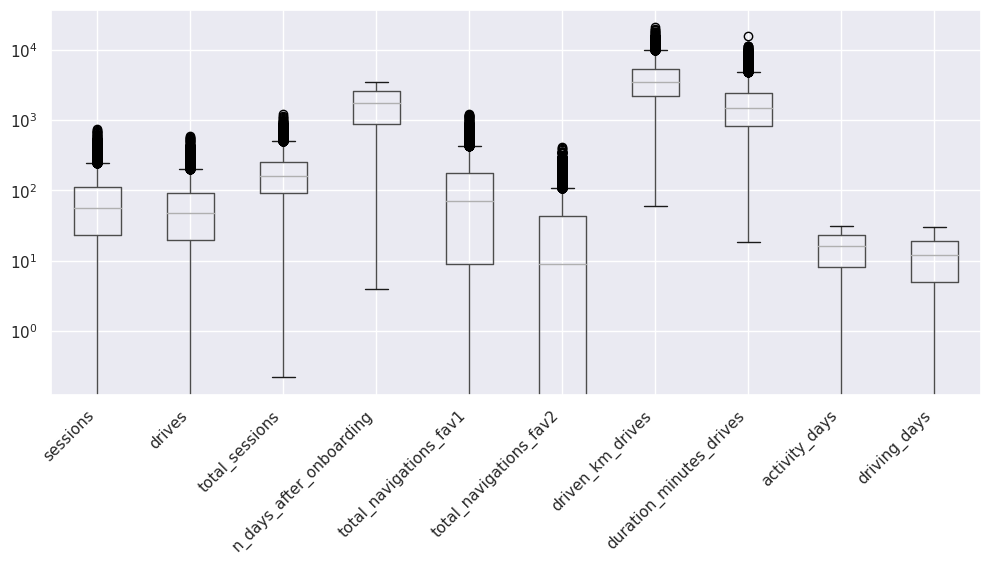

In [42]:
def df_boxplot(df):
    '''df is the input dataframe for plotting'''
    sns.set()
    df.boxplot(figsize=(12,5))
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.yscale('log')
    plt.show()
    
df_boxplot(df)

<h2 style=color:blue> Retain desired instances only </h2>


In [43]:
nan_data = False
outliers =  'replace' # 'replace', 'drop'
mask_data = True

def quantile_replace_outliers(num_series, qtag):
    '''num_seres: a numerical pandas series
    qtag: the quantile to be calculated and used for replacement of outliers. As +real number <=1
    Function Documentation:
    Series.quantile(q=0.5, interpolation='linear')
    Return value at the given quantile.'''

    qvalue = num_series.quantile(q=qtag)
    new_series = num_series.where(num_series<qvalue, qvalue)
    return qvalue, new_series

if nan_data == False:
    df.dropna(axis=0, inplace=True)
    df.reset_index()
    df.isna().sum()


outliers_columns = ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives']
if outliers == 'replace':
    for column in outliers_columns:
        quantile, tempseries = quantile_replace_outliers(df[column], 0.95)
        print('{}:\n max original = {:.3e}\n max_nooutliers = {:.3e}\n'
          .format(column, df[column].max(), tempseries.max()))
    #df[column] = tempseries # cause a warning, better drop column and the insert new one
    col_index = list(df.columns).index(column)
    df = df.drop(columns=column) # do no use inplace=True, it also generates a warning
    df.insert(col_index, column, tempseries)
        
elif outliers == 'drop':
     for column in outliers_columns:
         quantiles = df[column].quantile([0.25, 0.80])
         iqr_factor = 1.5
         iqr = quantiles.iloc[1] - quantiles.iloc[0]
         upper_limit = quantiles.iloc[1] + iqr_factor * iqr
         lower_limit = quantiles.iloc[0] - iqr_factor * iqr
         if lower_limit < 0:
             lower_limit = 0
        
         original_max = df[column].max()
         original_min = df[column].min()
         temp_mask = (df[column] <= lower_limit) | (df[column] >= upper_limit)
         df = df.drop(df[temp_mask].index)
         new_max = df[column].max()
         new_min = df[column].min()
 Calculate precision manually
### YOUR CODE HERE ###        print('Outliers for {}:\n max original = {:.3e}\n max_nooutliers = {:.3e}'
          .format(column, original_max, new_max))
         print(' min original = {:.3e}\n min_nooutliers = {:.3e}'
          .format(original_min, new_min))
         print('Lower limit is: {:1.1e}'.format(lower_limit))
         print('Upper limit is: {:1.1e}'.format(upper_limit))
         print('dropped {} rows from data frame\n'.format(len(temp_mask[temp_mask == True])))

if mask_data == True:
    # analyze only selected data

    # ALL users, no 0 data, all onboarding days
    temp_mask = (df['driven_km_drives'] > 0) & (df['total_sessions'] > 5) & (df['driving_days'] > 0) 
    df_original_len = len(df) 

    # very long drives users, no 0 data, more than 3 years using platform
    #tempmask = (df_filter['km_per_driving_day'] >= 400) & (df_filter['driving_days'] < 5) \
    #            & (df_filter['n_days_after_onboarding']>1000)

    # heavy users, no 0 data, more than 3 years using platform
    #tempmask = (df_filter['km_per_driving_day'] >= 400) & (df_filter['total_sessions'] > 5) \
    #            & (df_filter['n_days_after_onboarding']>1000)

    # heavy users, no 0 data, 1 year or less using platform
    #tempmask = (df_filter['km_per_driving_day'] >= 400) & (df_filter['total_sessions'] > 5) \
    #            & (df_filter['n_days_after_onboarding'] <= 366)
    
    df = df[temp_mask]
    df_new_len = len(df)
    print('Lenght of data frame changed from {} to {} after masking'.format(df_original_len, df_new_len ))

sessions:
 max original = 7.430e+02
 max_nooutliers = 2.430e+02

drives:
 max original = 5.960e+02
 max_nooutliers = 2.000e+02

total_sessions:
 max original = 1.216e+03
 max_nooutliers = 4.554e+02

driven_km_drives:
 max original = 2.118e+04
 max_nooutliers = 8.899e+03

duration_minutes_drives:
 max original = 1.585e+04
 max_nooutliers = 4.668e+03

Lenght of data frame changed from 14299 to 13292 after masking


<h2 style=color:blue> Introduce new calculated variable km_per_driving_day</h2>

In [44]:
# Insert calculated column km_per_driving_day:
df.insert(12, 'km_per_driving_day', df['driven_km_drives']/df['driving_days'] )

In [45]:
list(df.columns).index('drives')

2

In [46]:
for column in ['km_per_driving_day']:
    quantile, tempseries = quantile_replace_outliers(df[column], 0.95)
    print('{}:\n max original = {:.3e}\n max_nooutliers = {:.3e}\n'
          .format(column, df[column].max(), tempseries.max()))
    #df[column] = tempseries # cause a warning, better drop column and the insert new one
    col_index = list(df.columns).index(column)
    df = df.drop(columns=column) # do no use inplace=True, it also generates a warning
    df.insert(col_index, column, tempseries)


km_per_driving_day:
 max original = 1.542e+04
 max_nooutliers = 2.392e+03



<h2 style=color:blue> CHECK DISTRIBUTIONS AFTER REMOVING OUTLIERS</h2>

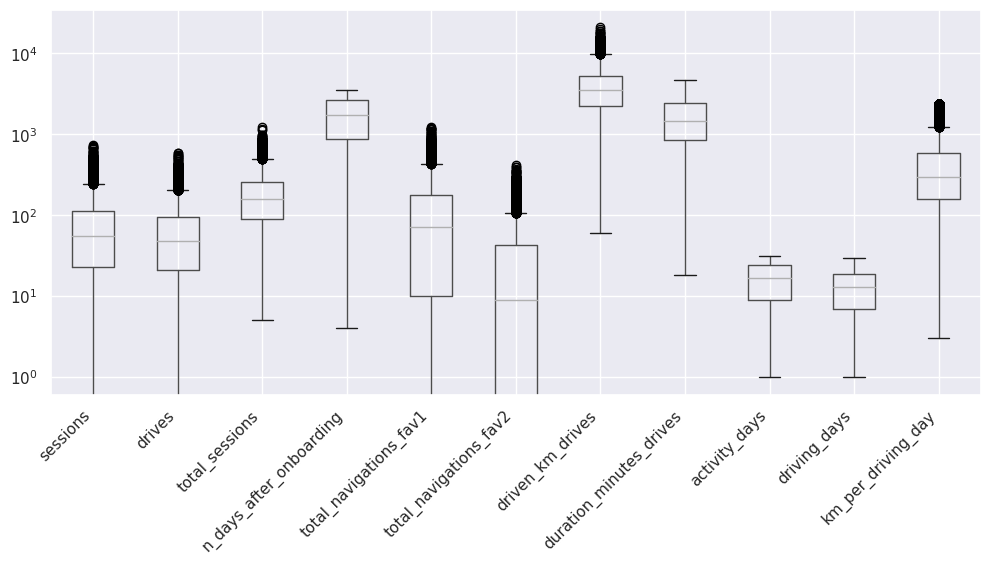

In [47]:
df_boxplot(df)

<h2 style=color:blue> Introduce new calculated binary variable pro_driver</h2>

In [48]:
# Create a new, binary feature called professional_driver that is a 1 for users who had 
# 60 or more drives and drove on 15+ days in the last month.

temp_mask = (df['drives'] >= 60) & (df['driving_days'] >= 15)

temp_series = np.where(temp_mask, 1, 0)

df.insert(13, 'pro_driver', temp_series)

In [49]:
# Quick checks for the new variable:
df[temp_mask][['drives', 'driving_days', 'pro_driver']].head()

,drives,driving_days,pro_driver
0,226,19,1
4,68,18,1
19,98,20,1
21,119,21,1
22,60,16,1


In [50]:
print(df['pro_driver'].value_counts())
print('pro driver mean of drives = {:.2f}'.format(df[df['pro_driver'] == 1] ['drives'].mean()))
print('pro driver mean of driving_days = {:.2f}'.format(df[df['pro_driver'] == 1] ['driving_days'].mean()))
print('normal driver mean of drives = {:.2f}'.format(df[df['pro_driver'] == 0] ['drives'].mean()))
print('normal driver mean of driving_days = {:.2f}'.format(df[df['pro_driver'] == 0] ['driving_days'].mean()))

pro_driver
0    10804
1     2488
Name: count, dtype: int64
pro driver mean of drives = 125.22
pro driver mean of driving_days = 20.20
normal driver mean of drives = 54.40
normal driver mean of driving_days = 11.45


<h2 style=color:blue> Calculate Churn Rate for Pro and Non-Pro drivers </h2>

In [51]:
df['label'].value_counts()

label
retained    11150
churned      2142
Name: count, dtype: int64

In [52]:
df.groupby(['pro_driver'])['label'].value_counts()

pro_driver  label   
0           retained    8850
            churned     1954
1           retained    2300
            churned      188
Name: count, dtype: int64

In [56]:
pd.DataFrame(df.groupby(['pro_driver'])['label'].value_counts(normalize=True)).rename(columns={'label':'ratio'})

proportion
pro_driver label               
0          retained    0.819141
           churned     0.180859
1          retained    0.924437
           churned     0.075563

<h3 style=color:green>
    The churn rate for professional drivers is 7.5%, while for non-professionals is 18.1%. This seems like it could add predictive signal to the model. </h3>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

<h2 style=color:blue> Encode categorical output variable 'label' as 'churned' </h2>

In [57]:
churned = prepro.OneHotEncoder().fit(df[['label']])
churned.categories_

[array(['churned', 'retained'], dtype=object)]

In [58]:
print(churned.categories_)
print(churned.categories_[0][0])

[array(['churned', 'retained'], dtype=object)]
churned


In [59]:
# Create binary column 'churned' for the categorical 'label':

churned = prepro.OneHotEncoder(drop=['retained']).fit_transform(df[['label']]).toarray()
df.insert(1, column='churned',value=churned)


In [60]:
df.tail()

,label,churned,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,pro_driver
14994,retained,0.0,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,170.029229,0
14995,retained,0.0,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,203.128760,0
14996,retained,0.0,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,182.225002,1
14997,churned,1.0,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,675.293092,0
14998,retained,0.0,73,58,353.419797,3383,13,51,6030.498773,3042.436423,14,13,iPhone,463.884521,0


### **Task 3b. Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [61]:
# Generate a correlation matrix
# DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)
# TO include categoricals convert them to numerical with OneHotEncoder or similar
corr_matrix = df.corr(method='pearson', numeric_only=True) 

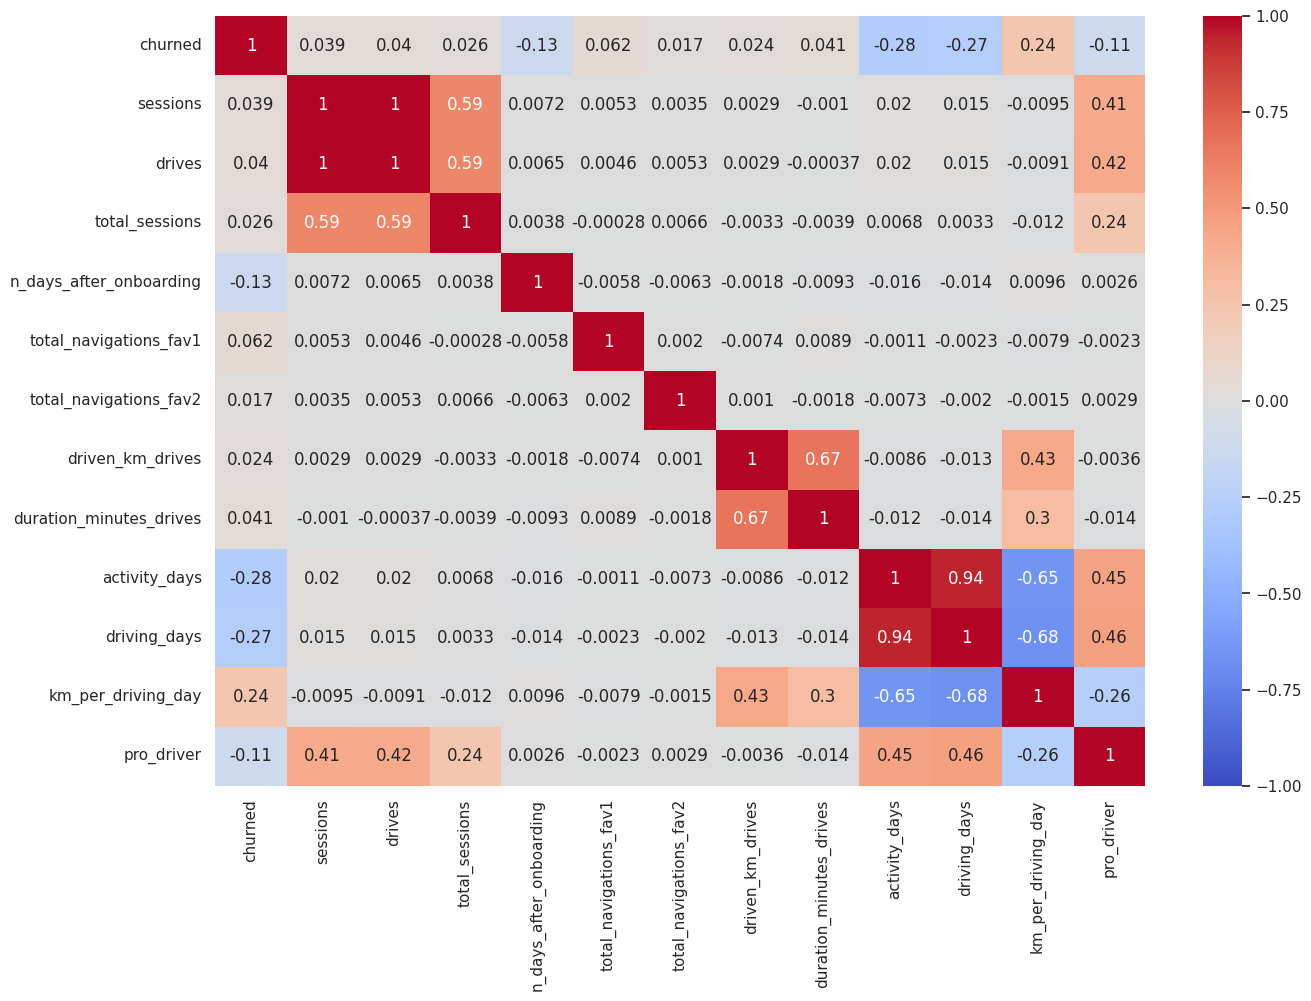

In [62]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
#plt.title('Correlation heatmap indicates many low correlated variables',fontsize=18)
plt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Question:** Which variables are multicollinear with each other?
<ul style=color:green;font-size:13pt>
    <li>sessions, drives: 1.0. Drop session with lower correlation to churned</li>
    <li>activity_days, driving_days: 0.94. Drop driving days with lower correlation to churned</li>
    <li>the categorical device will not be used given that in previous hypothesis analysis found that churned is not
    statistically coupled to device type</li>
</ul>

### **Task 3d. Model building**

#### **Assign predictor variables and target**

To build your model you need to determine what X variables you want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

<h2 style=color:blue> Keep Only selected X variables for model </h2>

In [63]:
df.columns

Index(['label', 'churned', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device', 'km_per_driving_day',
       'pro_driver'],
      dtype='object')

In [64]:
# Sets:
#x_drop = {'label', 'churned', 'device', 'sessions', 'driving_days'}

x_drop = {'label', 'churned', 'device', 'sessions', 'driving_days', 'driven_km_drives'}

#x_drop = {'label', 'churned', 'device', 'sessions', 'driving_days', 'driven_km_drives',
#         'n_days_after_onboarding'}
#x_drop = {'label', 'churned', 'device', 'sessions', 'driven_km_drives',
#         'duration_minutes_drives', 'n_days_after_onboarding',
#         'km_per_driving_day'}
#x_drop = {'label', 'churned', 'device', 'sessions', 'driving_days', 'driven_km_drives',
#         'total_navigations_fav2', 'duration_minutes_drives', 'n_days_after_onboarding',
#         'total_sessions', 'km_per_driving_day'}
x_all = set(df.columns)
print(x_all - x_drop)

{'n_days_after_onboarding', 'total_navigations_fav2', 'km_per_driving_day', 'total_sessions', 'total_navigations_fav1', 'activity_days', 'duration_minutes_drives', 'drives', 'pro_driver'}


In [65]:
# Isolate predictor variables
# recalling a pro-driver is defined by: (df['drives'] >= 60) & (df['driving_days'] >= 15)
x_candidates = list(x_all - x_drop)

<h2 style=color:blue>Split Sample in Train and Test Sets and Train the Model </h2>

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df[x_candidates], df['churned'], test_size=0.3, random_state=42)
len(y_train)

9304

In [68]:
# Train the model:
# It is important to add penalty = 'none' since your predictors are unscaled!!!

clf = LogisticRegression(penalty=None).fit(X_train, y_train)

print(clf.intercept_)
#print(df[x_candidates].columns)
print(clf.feature_names_in_)
print(clf.coef_)

[-0.00304918]
['n_days_after_onboarding' 'total_navigations_fav2' 'km_per_driving_day'
 'total_sessions' 'total_navigations_fav1' 'activity_days'
 'duration_minutes_drives' 'drives' 'pro_driver']
[[-4.56637718e-04  7.80742851e-04  4.07686948e-05  8.00997667e-05
   1.10329083e-03 -1.01644812e-01  9.06870447e-05  1.95594498e-03
  -1.36190575e-03]]


<h2 style=color:blue> Calculate exp value for Regression Coefficients </h2>
<p style=color:blue;font-size:12pt>
    $e^{\theta_i}$ provides the specific contribution of variable $i$ to the variation of the probabiliy ratio $P(Y=1) \over P(Y=0)$ also called the 'odds'
</p>


In [69]:
coeffs = clf.coef_[0][:] 
cfactors = np.exp(coeffs)
temp_array = np.transpose([coeffs, cfactors])

model_coeff = pd.DataFrame(data=temp_array, index=df[x_candidates].columns, columns=[r'$\theta$', r'factor_$e^\theta$'])
model_coeff.insert(2, r'$factor_e^\theta-1$',np.abs(model_coeff[ r'factor_$e^\theta$']-1))
model_coeff.sort_values(by=r'$factor_e^\theta-1$', ascending=False)

,$\theta$,factor_$e^\theta$,$factor_e^\theta-1$
activity_days,-0.101645,0.903350,0.096650
drives,0.001956,1.001958,0.001958
pro_driver,-0.001362,0.998639,0.001361
total_navigations_fav1,0.001103,1.001104,0.001104
total_navigations_fav2,0.000781,1.000781,0.000781
n_days_after_onboarding,-0.000457,0.999543,0.000457
duration_minutes_drives,0.000091,1.000091,0.000091
total_sessions,0.000080,1.000080,0.000080
km_per_driving_day,0.000041,1.000041,0.000041


In [76]:
order = list(model_coeff.sort_values(by=r'$factor_e^\theta-1$', ascending=False).index)
order

['activity_days',
 'drives',
 'pro_driver',
 'total_navigations_fav1',
 'total_navigations_fav2',
 'n_days_after_onboarding',
 'duration_minutes_drives',
 'total_sessions',
 'km_per_driving_day']

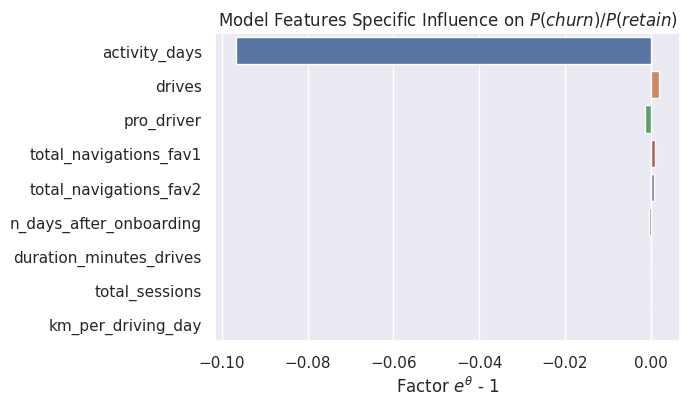

In [78]:
sns.set()
plt.figure(figsize=[6,4])
thetha_fac_diff = model_coeff[r'factor_$e^\theta$'] - 1
sns.barplot(data=model_coeff, y=model_coeff.index, x=thetha_fac_diff, order=order)
plt.xlabel(r'Factor $e^\theta$ - 1')
plt.title(r'Model Features Specific Influence on $P(churn) / P(retain)$')
plt.show()

<h2 style=color:blue>  Plot Features Against Calulated Odds from Model</h2>
<p style=color:blue;font-size:12pt>
    We check whehter the projections of the ratio of probabilities $P(Y=1) \over P(Y=0)$ also called the 'odds' over the axis of the 
    features follow a linear or near-linear pattern
</p>

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [79]:
# Get the predicted probabilities of the training data
print('The order of columns for \'churned\' probabilities is:')
print(clf.classes_)

y_probability_train = pd.DataFrame(data=clf.predict_proba(X_train), columns=['P_retain', 'P_churn'])

The order of columns for 'churned' probabilities is:
[0. 1.]


In [80]:
y_probability_train.head()

,P_retain,P_churn
0,0.615531,0.384469
1,0.950754,0.049246
2,0.591067,0.408933
3,0.886986,0.113014
4,0.771539,0.228461


In [81]:
clf.predict_proba(X_train)

array([[0.61553055, 0.38446945],
       [0.95075378, 0.04924622],
       [0.59106705, 0.40893295],
       ...,
       [0.92219584, 0.07780416],
       [0.94038087, 0.05961913],
       [0.47698927, 0.52301073]])

In [82]:
print(y_train.head(3))
print(y_train.tail(3))

1805    1.0
3191    0.0
4959    1.0
Name: churned, dtype: float64
6090    0.0
967     0.0
8219    1.0
Name: churned, dtype: float64


In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

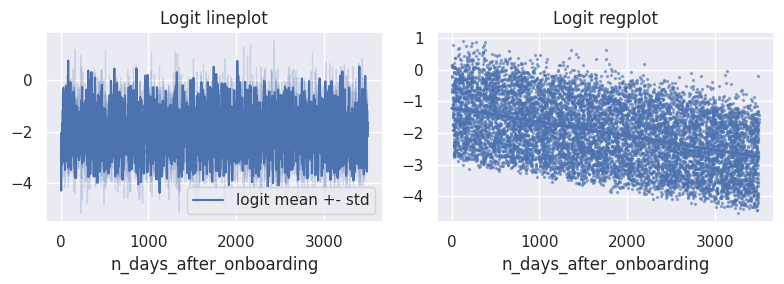

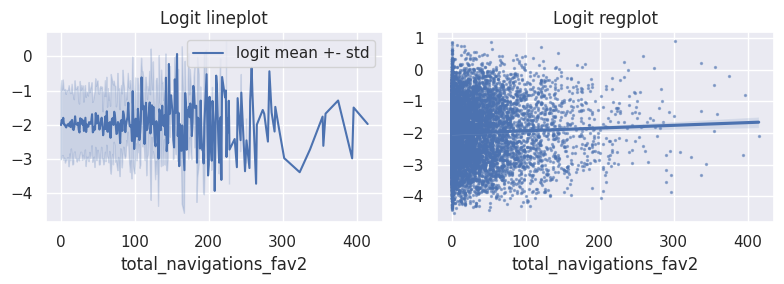

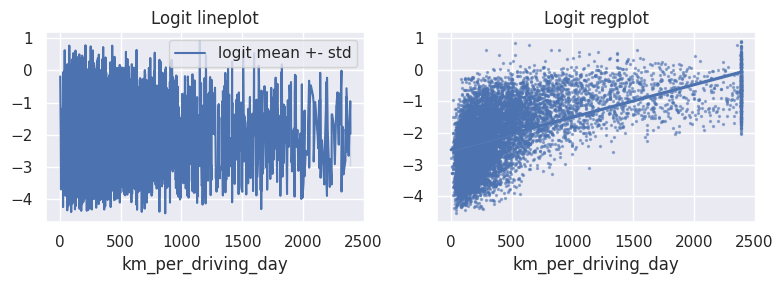

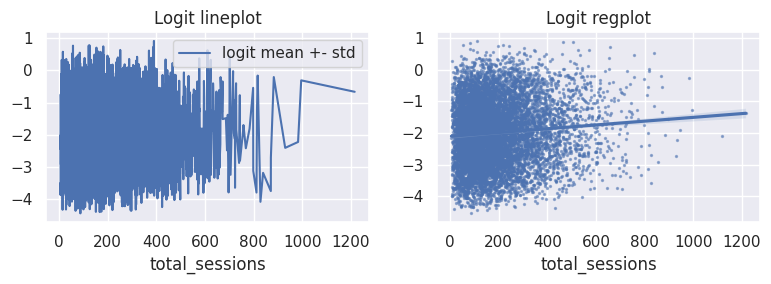

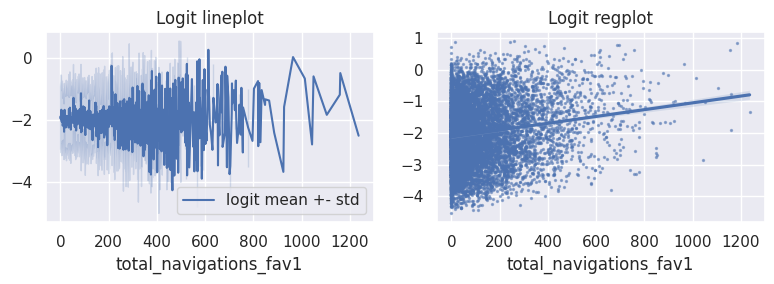

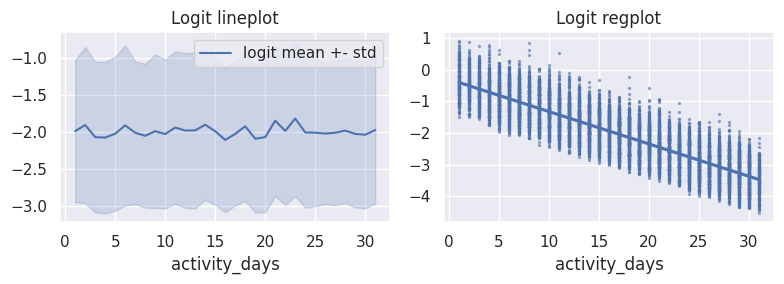

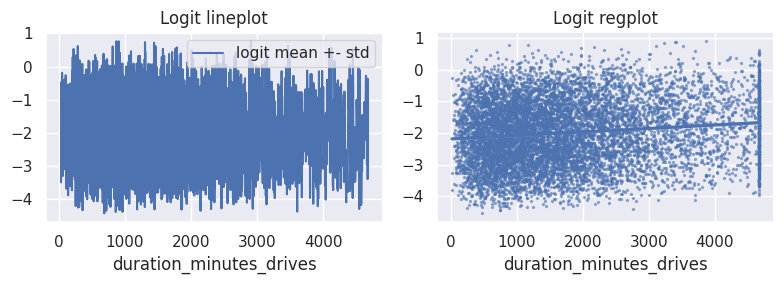

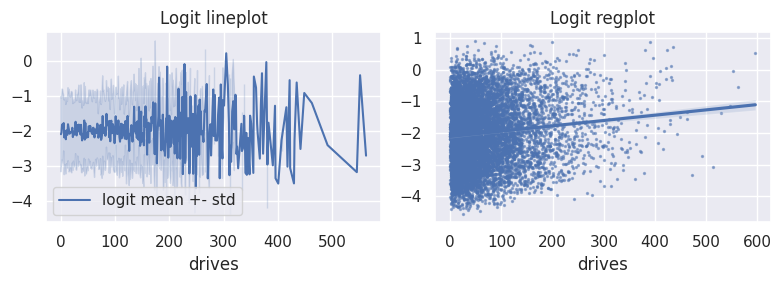

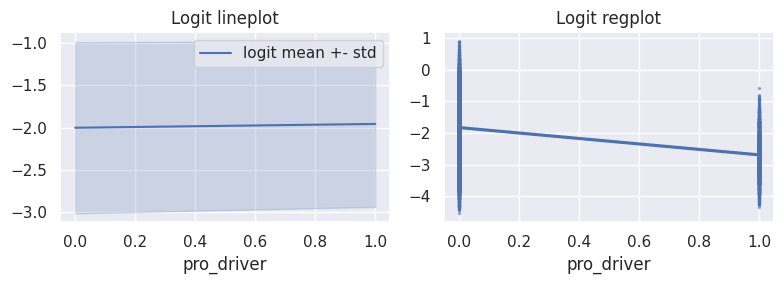

In [83]:
logit = np.log(y_probability_train['P_churn']/y_probability_train['P_retain'])

# Plot the projection of the calculated logits for model for each x variable:
for feature in x_candidates:
    fig, axes =  plt.subplots(1,2, figsize=(8,3))
    sns.lineplot(data=X_train, x=feature, y=logit, errorbar='sd', label='logit mean +- std', ax=axes[0])
    axes[0].set_title('Logit lineplot')
    sns.regplot(data=X_train, x=feature, y=logit, scatter_kws={'s': 2, 'alpha': 0.5}, ax=axes[1])
    axes[1].set_title('Logit regplot')
    plt.tight_layout()
    plt.show()


## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


<h2 style=color:blue> Make Predicitons on Test Set based on Model </h2>

In [85]:
# Generate predictions on X_test
y_test_pred = clf.predict(X_test)

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.  What is the accuracy of your model?

*Consider:  Is accuracy the best metric to use to evaluate this model?*

In [87]:
# Score the model (accuracy) on the test data
### YOUR CODE HERE ###
scores=dict()
scores['accuracy'] =  metrics.accuracy_score(y_test, y_test_pred)
scores['precision'] =  metrics.precision_score(y_test, y_test_pred)
scores['recall'] =  metrics.recall_score(y_test, y_test_pred)
#scores['f1'] =  metrics.f1_score(y_test, y_test_pred)
#scores

In [88]:
scores.values()
scores = pd.DataFrame(data=scores.values(), index=scores.keys(), columns=['score'])
scores

,score
accuracy,0.833751
precision,0.604396
recall,0.080645


In [89]:
score_meaning = ('Overall prediction OK','FP many','FN too may')
scores.insert(1, 'meaning', score_meaning)
scores

,score,meaning
accuracy,0.833751,Overall prediction OK
precision,0.604396,FP many
recall,0.080645,FN too may


### **Task 4b. Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [90]:
### YOUR CODE HERE ###
cm = metrics.confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
print(cm)

[[3270   36]
 [ 627   55]]


In [91]:
score_counts = dict()
score_counts['TP'] = cm[1,1]
score_counts['TN'] = cm[0,0]
score_counts['FP'] = cm[0,1]
score_counts['FN'] = cm[1,0]
score_counts['Total'] = sum(sum(cm))
score_counts = pd.DataFrame(data=score_counts.values(), index=score_counts.keys(), columns=['score_counts'])
score_counts

,score_counts
TP,55
TN,3270
FP,36
FN,627
Total,3988


In [92]:
pd.DataFrame(y_test.value_counts())

,count
churned,
0.0,3306
1.0,682


You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

<Figure size 300x300 with 0 Axes>

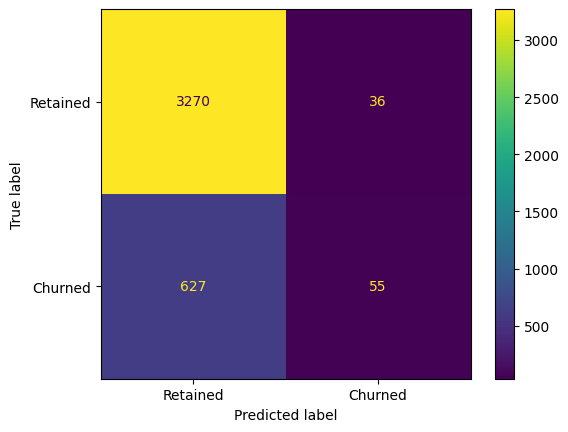

In [93]:
import matplotlib
matplotlib.rc_file_defaults()
plt.figure(figsize=(3,3))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Retained', 'Churned'])
disp.plot()
plt.show()

In [94]:
# prin report:
print(metrics.classification_report(y_test, y_test_pred, target_names=['Retained', 'Churned']))

              precision    recall  f1-score   support

    Retained       0.84      0.99      0.91      3306
     Churned       0.60      0.08      0.14       682

    accuracy                           0.83      3988
   macro avg       0.72      0.53      0.53      3988
weighted avg       0.80      0.83      0.78      3988



**Note:** The model has decent precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

### **Task 4c. Conclusion**

Now that you've built your regression model, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What variable most influenced the model's prediction? How? Was this surprising?
   $activity_days$ is by far the most influential variable. It decreases the chance to churn.

3. Were there any variables that you expected to be stronger predictors than they were?

4. Why might a variable you thought to be important not be important in the model?

5. Would you recommend that Waze use this model? Why or why not?

6. What could you do to improve this model?

7. What additional features would you like to have to help improve the model?



<ul style=color:green;font-size:14pt>
    <li>The model is very poor in predicting churning: 55 TP out of 682 churned people in test set</li>
    <li>The model is good in predicting retention: 3266 TN out of 3306 retained customers in test set</li>
    <li>Reducing the amount of features leads to higher bias</li>
</ul>